# Лабораторная работа 4

Деревья решений

Выполнил: 6133, Борисов Дмитрий Сергеевич

Похожая работа выполненна мной в [репозитории](https://github.com/DiBoS290699/Artificial-Intelligence-and-Machine-Learning/blob/master/Lab3/Lab3.ipynb) по [Artificial-Intelligence-and-Machine-Learning](https://github.com/DiBoS290699/Artificial-Intelligence-and-Machine-Learning)

0.  Выберите набор данных для классификации (бинарной или многоклассовой — не важно). Опишите данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. В общем, проведите "визуальный" анализ ваших данных.

In [36]:
import pandas as pd
from numpy import argmax
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns

## Star dataset to predict star types

A 6 class star dataset for star classification with Deep Learned approaches.

**Dataset Info:**

This is a dataset consisting of several features of stars.

Some of them are:

* __Integer__: Absolute Temperature **(in K)** - This column consists of the Surface temperatures of several stars
* __Real__: Relative Luminosity **(L/Lo)** - This column consists of the Luminosity of several stars calculated with respect to sun(L/Lo)
* __Real__: Relative Radius **(R/Ro)** - This column consists of the Radius of several stars calculated with respect to sun(R/Ro)
* __Real__: Absolute Magnitude **(Mv)** - This column consists of the Absolute Visual magnitude(Mv) of several stars
* __Categorical__: Star Color **(white,Red,Blue,Yellow,yellow-orange etc)** - This column contains the info about the colors of each star after Spectral Analysis
* __Categorical__: Spectral Class **(O,B,A,F,G,K,M)** - This column contains info about the spectral classes of each star(O,B,A,F,G,K,M) 
* __Categorical__: Star Type **(Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , SuperGiants, HyperGiants)** - This column is the output class (6 classes ranging from 0-5) 0 -> Brown Dwarf 1-> Red Dwarf 2 -> White Dwarf 3-> Main Sequence 4 -> Supergiant 5 -> Hypergiant

Lo = 3.828 x 10^26 Watts (Avg Luminosity of Sun)

Ro = 6.9551 x 10^8 m (Avg Radius of Sun)

In [2]:
dataset = pd.read_csv('../data/Star_dataset.csv')
dataset

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,red,M
1,3042,0.000500,0.1542,16.60,0,red,M
2,2600,0.000300,0.1020,18.70,0,red,M
3,2800,0.000200,0.1600,16.65,0,red,M
4,1939,0.000138,0.1030,20.06,0,red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,blue,O
236,30839,834042.000000,1194.0000,-10.63,5,blue,O
237,8829,537493.000000,1423.0000,-10.73,5,white,A
238,9235,404940.000000,1112.0000,-11.23,5,white,A


In [3]:
dataset['Star type'].value_counts()

0    40
1    40
2    40
3    40
4    40
5    40
Name: Star type, dtype: int64

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [5]:
dataset.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


### 1.0. Для вашего датасета преобразовать категориальные признаки в бинарные с помощью `pd.factorize` / `pd.get_dummies`

In [6]:
dummy_sp_cl = pd.get_dummies(dataset['Spectral Class'], prefix='Sp_Cl_')
dummy_sp_cl

,Sp_Cl__A,Sp_Cl__B,Sp_Cl__F,Sp_Cl__G,Sp_Cl__K,Sp_Cl__M,Sp_Cl__O
0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
235,0,0,0,0,0,0,1
236,0,0,0,0,0,0,1
237,1,0,0,0,0,0,0
238,1,0,0,0,0,0,0


In [7]:
dummy_star_c = pd.get_dummies(dataset['Star color'], prefix='Color_')
dummy_star_c

,Color__blue,Color__blue-white,Color__orange,Color__orange-red,Color__pale-yellow-orange,Color__red,Color__white,Color__white-yellow,Color__whitish,Color__yellow-white,Color__yellowish,Color__yellowish-white
0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
235,1,0,0,0,0,0,0,0,0,0,0,0
236,1,0,0,0,0,0,0,0,0,0,0,0
237,0,0,0,0,0,0,1,0,0,0,0,0
238,0,0,0,0,0,0,1,0,0,0,0,0


In [8]:
print('Before', dataset.shape)
dataset.drop(columns=['Spectral Class', 'Star color'], inplace=True)
dataset = pd.concat([dataset, dummy_star_c, dummy_sp_cl], axis=1)
print('After', dataset.shape)

Before (240, 7)
After (240, 24)


In [9]:
labels = dataset['Star type']
data = dataset.drop(columns='Star type')
data.shape, labels.shape

((240, 23), (240,))

### 1.1. С помощью sklearn.preprocessing.StandardScaler нормализовать значения признаков и построить для нормализованного датасета `KNeighborsClassifier` (без использования конвееров)

In [10]:
# Построение confusion matrix для лучшей выборки гиперпараметров
def report_classification(model, Xtest, Ytest, get_conf_matr=False):
    pred = model.predict(Xtest)

    print('Отчёт по метрикам оценки мультиклассового классификации:')
    print(classification_report(Ytest, pred))
    conf_mat = confusion_matrix(Ytest, pred)
    sn.heatmap(conf_mat, annot=True, fmt="d")
    
    return conf_mat if get_conf_matr else None

In [11]:
scaled_data = StandardScaler().fit_transform(data)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(scaled_data, labels, test_size=0.3, random_state=0)
results = cross_validate(KNeighborsClassifier(n_neighbors = 1), scaled_data, labels, cv=5, 
                                scoring='accuracy', return_estimator=True, 
                                return_train_score=True)
results = pd.DataFrame(results)
results

,fit_time,score_time,estimator,test_score,train_score
0,0.000998,0.007990,KNeighborsClassifier(n_neighbors=1),0.979167,1.0
1,0.001004,0.001011,KNeighborsClassifier(n_neighbors=1),0.854167,1.0
2,0.001011,0.001988,KNeighborsClassifier(n_neighbors=1),0.937500,1.0
3,0.001000,0.001004,KNeighborsClassifier(n_neighbors=1),0.937500,1.0
4,0.001000,0.002000,KNeighborsClassifier(n_neighbors=1),0.937500,1.0


Отчёт по метрикам оценки мультиклассового классификации:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       0.89      1.00      0.94         8
           3       1.00      0.94      0.97        16
           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00        12

    accuracy                           0.99        72
   macro avg       0.98      0.99      0.98        72
weighted avg       0.99      0.99      0.99        72



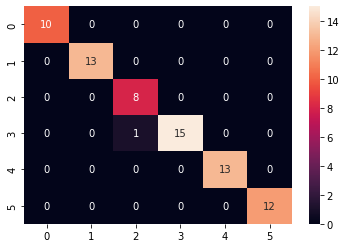

In [12]:
kn_best_acc = results['test_score'].max()
kn_model = results[results['test_score'] == kn_best_acc]['estimator'].head(1).item()
report_classification(kn_model, Xtest, Ytest)

### 1.2. То же самое и использованием `sklearn.pipeline.Pipeline`

In [13]:
p_Xtrain, p_Xtest, p_Ytrain, p_Ytest = train_test_split(data, labels, test_size=0.3, random_state=0)
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(1))
pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=1))])

In [14]:
pipe.fit(p_Xtrain, p_Ytrain)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=1))])

Отчёт по метрикам оценки мультиклассового классификации:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.93      1.00      0.96        13
           2       1.00      1.00      1.00         8
           3       0.94      0.94      0.94        16
           4       1.00      0.92      0.96        13
           5       1.00      1.00      1.00        12

    accuracy                           0.97        72
   macro avg       0.98      0.98      0.98        72
weighted avg       0.97      0.97      0.97        72



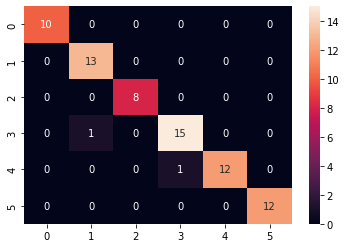

In [15]:
report_classification(pipe, p_Xtest, p_Ytest)

### 1.3. С помощью `GridSearchCV` произвести подбор гиперпараметра `KNeighborsClassifier` (`n_neighbors`) и выведите значение гиперпараметра и метрику для наилучшей модели

In [16]:
kn_parameters = {'n_neighbors': range(1, 10)}
kn_parameters

{'n_neighbors': range(1, 10)}

In [17]:
def report_grid(model, params, fit_x, fit_y, cv=5, short_results=True, sort_by_score=False):
    grid = GridSearchCV(model, cv=5, param_grid=params)
    grid.fit(fit_x, fit_y)
    print(f"Best: {grid.best_score_} using {grid.best_params_}") 
    results = pd.DataFrame(grid.cv_results_)
    if sort_by_score:
        results = results.sort_values(by='mean_test_score', ascending=False).reset_index()
    return grid, results.loc[:, ['params', 'mean_test_score', 'std_test_score']] if short_results else results

In [18]:
grid, kn_results = report_grid(KNeighborsClassifier(), kn_parameters, Xtrain, Ytrain, sort_by_score=True)
kn_results

Best: 0.9468805704099822 using {'n_neighbors': 1}


,params,mean_test_score,std_test_score
0,{'n_neighbors': 1},0.946881,0.043131
1,{'n_neighbors': 2},0.922995,0.047932
2,{'n_neighbors': 3},0.917291,0.050441
3,{'n_neighbors': 4},0.863458,0.053877
4,{'n_neighbors': 5},0.857754,0.064646
5,{'n_neighbors': 6},0.821925,0.075829
6,{'n_neighbors': 7},0.816043,0.074606
7,{'n_neighbors': 8},0.791979,0.054923
8,{'n_neighbors': 9},0.785740,0.050614



### 2.1. Продемонстрировать работу `DecisionTreeClassifier`, посчитать метрики качества на отложенной выборке

In [19]:
tree_results = cross_validate(DecisionTreeClassifier(), scaled_data, labels, cv=5, 
                                scoring='accuracy', return_estimator=True, 
                                return_train_score=True)
tree_results = pd.DataFrame(tree_results)
tree_results

,fit_time,score_time,estimator,test_score,train_score
0,0.001993,0.000000,DecisionTreeClassifier(),1.000000,1.0
1,0.000000,0.001003,DecisionTreeClassifier(),0.958333,1.0
2,0.000997,0.000000,DecisionTreeClassifier(),1.000000,1.0
3,0.000000,0.000998,DecisionTreeClassifier(),1.000000,1.0
4,0.001000,0.000000,DecisionTreeClassifier(),1.000000,1.0


Отчёт по метрикам оценки мультиклассового классификации:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00        12

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



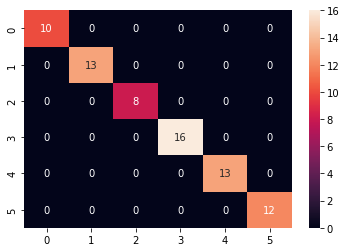

In [20]:
tree_best_acc = tree_results['test_score'].max()
tree_model = tree_results[tree_results['test_score'] == tree_best_acc]['estimator'].head(1).item()
report_classification(tree_model, Xtest, Ytest)

### 2.2. С помощью `GridSearchCV` произвести подбор гиперпараметров для поиска наилучшего дерева (перебрать `max_depth`, `max_features` и может быть что-то ещё)

In [31]:
tree_parameters = {
    'max_depth': range(2, 8),
    'max_features': range(2, len(data.columns)),
    'criterion': ['gini', 'entropy']
}

In [32]:
tree_grid, tree_results = report_grid(DecisionTreeClassifier(), tree_parameters, Xtrain, Ytrain, sort_by_score=True)
tree_results.head(10)

Best: 1.0 using {'criterion': 'gini', 'max_depth': 5, 'max_features': 15}


,params,mean_test_score,std_test_score
0,"{'criterion': 'entropy', 'max_depth': 7, 'max_...",1.0,0.0
1,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",1.0,0.0
2,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",1.0,0.0
3,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",1.0,0.0
4,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",1.0,0.0
5,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",1.0,0.0
6,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",1.0,0.0
7,"{'criterion': 'gini', 'max_depth': 7, 'max_fea...",1.0,0.0
8,"{'criterion': 'gini', 'max_depth': 7, 'max_fea...",1.0,0.0
9,"{'criterion': 'gini', 'max_depth': 7, 'max_fea...",1.0,0.0


Отчёт по метрикам оценки мультиклассового классификации:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00        12

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



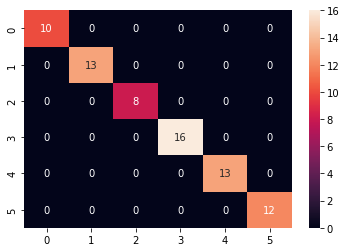

In [33]:
best_tree_results = cross_validate(DecisionTreeClassifier().set_params(**tree_grid.best_params_), scaled_data, labels, cv=5, 
                                scoring='accuracy', return_estimator=True, 
                                return_train_score=True)
best_tree_results = pd.DataFrame(best_tree_results)
best_tree_best_acc = best_tree_results['test_score'].max()
best_tree_model = best_tree_results[best_tree_results['test_score'] == best_tree_best_acc]['estimator'].head(1).item()
report_classification(best_tree_model, Xtest, Ytest)

### 2.3. Для полученного наилучшего дерева построить график feature_importances и дополнительно напечатать 3 наиболее важных признака, отсортировав их по убыванию важности

<AxesSubplot:>

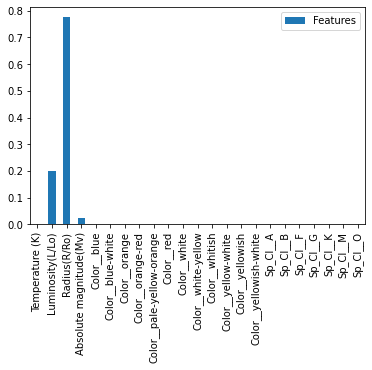

In [57]:
feature_importances = pd.DataFrame(data=best_tree_model.feature_importances_, index=data.columns, columns=['Features'])
feature_importances.plot(kind='bar')

In [60]:
feature_importances.sort_values(by='Features', ascending=False).head(3)

,Features
Radius(R/Ro),0.775781
Luminosity(L/Lo),0.200000
Absolute magnitude(Mv),0.024219


### 3.1. Продемонстрировать работу случайного леса `RandomForestClassifier`


### 3.2. С помощью `GridSearchCV` произвести подбор гиперпараметров для поиск наилучшего леса, посмотреть насколько улучшились метрики

### 4. Сделать выводы. Какой классификатор и с камими гиперпараметрами дал в итоге наилучший результат для выбранного датасета на отложенной выборке.